## Let's dive into inferential statistics.

**What is Inferential Statistics?**

Inferential statistics allows you to make predictions and inferences about a larger population based on samples of data. It helps in hypothesis testing, estimating population parameters, and making forecasts. Unlike descriptive statistics, which describes what the data shows, inferential statistics allows for broader conclusions.

## Key Concepts in Inferential Statistics
* Population vs. Sample: The population is the entire group you're interested in, while a sample is a subset of the population used for analysis.
* Parameter vs. Statistic: A parameter is a characteristic of a population (like the mean age of all people in a city), while a statistic is a characteristic of a sample (like the mean age of people in a survey from that city).
* Sampling Distribution: This is the distribution of a statistic over many samples drawn from the same population. It is fundamental in determining how well a statistic represents a parameter.
* Confidence Intervals: These are used to estimate the value of a population parameter. A 95% confidence interval means you can be 95% certain the population parameter lies within this interval.
* Hypothesis Testing: This is a method of making decisions using data, whether it's rejecting or not rejecting a hypothesis. It often uses test statistics and p-values to determine results.
## Common Statistical Tests
* T-test: Used to compare the means of two groups (e.g., comparing the effectiveness of two medications).
* ANOVA (Analysis of Variance): Used to compare the means of three or more groups.
* Chi-square Test: Used for categorical data to see if distributions of categorical variables differ from one another.
* Regression Analysis: Used to understand relationships between variables. Linear regression is a common method for predicting a quantitative response.

## Introduction
Welcome to exploration of inferential statistics! This notebook will guide you through the essential concepts and methods used to make predictions and decisions based on data samples. I'll use practical examples and visualizations to enhance your understanding.

## Key Concepts of Inferential Statistics

### Population vs. Sample
In inferential statistics, understanding the distinction between a population and a sample is crucial. Here, we'll generate a synthetic population and select a sample to demonstrate this concept.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm 

In [2]:
# Generating a population and a sample
population = np.random.normal(loc=50, scale=10, size=10000)  # Large population
sample = np.random.choice(population, size=100)  # Smaller sample

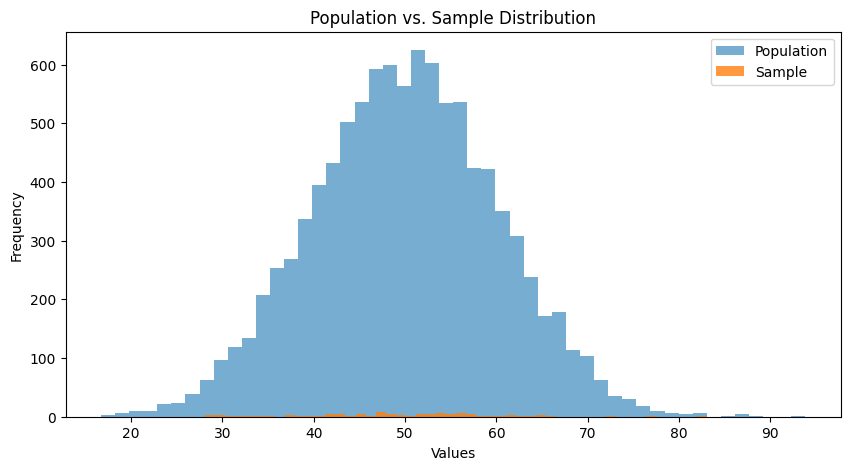

In [3]:
# Plotting both distributions
plt.figure(figsize=(10, 5))
plt.hist(population, bins=50, alpha=0.6, label='Population')
plt.hist(sample, bins=50, alpha=0.8, label='Sample')
plt.title('Population vs. Sample Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Confidence Intervals
Confidence intervals are a range of values that are believed to encompass the true population parameter with a certain level of confidence. Here's how to calculate and visualize a 95% confidence interval for our sample mean.

95% Confidence Interval: 47.72 to 51.90


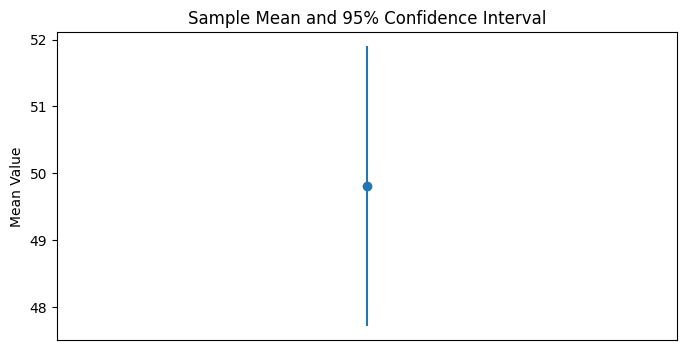

In [4]:
# Calculate the sample mean and standard error of the mean
sample_mean = np.mean(sample)
sample_se = stats.sem(sample)

# Define the confidence level and calculate the confidence interval
confidence_interval = stats.t.interval(0.95, len(sample)-1, loc=sample_mean, scale=sample_se)

# Output the confidence interval
print(f"95% Confidence Interval: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f}")

# Visualizing the confidence interval
plt.figure(figsize=(8, 4))
plt.errorbar(0, sample_mean, yerr=[sample_mean - confidence_interval[0]], fmt='o')
plt.title('Sample Mean and 95% Confidence Interval')
plt.ylabel('Mean Value')
plt.xticks([])
plt.show()


## Point Estimates
A point estimate is a single value used to approximate a population parameter. The most common point estimates are the sample mean, sample variance, and sample proportion, which estimate the population mean, variance, and proportion, respectively.

Point Estimate of Mean: 49.81
Point Estimate of Variance: 111.30


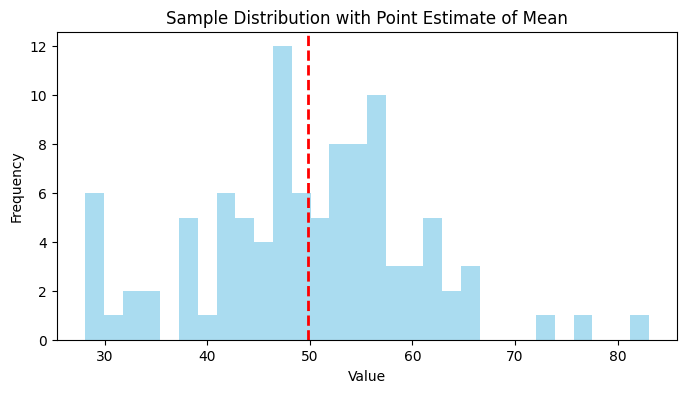

In [5]:
# Calculate point estimates for the mean and variance
sample_mean = np.mean(sample)
sample_variance = np.var(sample, ddof=1)  # ddof=1 for an unbiased estimate

# Display the point estimates
print(f"Point Estimate of Mean: {sample_mean:.2f}")
print(f"Point Estimate of Variance: {sample_variance:.2f}")

# Visualizing the point estimate of the mean
plt.figure(figsize=(8, 4))
plt.hist(sample, bins=30, color='skyblue', alpha=0.7)
plt.axvline(sample_mean, color='r', linestyle='dashed', linewidth=2)
plt.title('Sample Distribution with Point Estimate of Mean')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Performing Statistical Tests
**T-Test Example**
Let's perform a T-test to determine if there are statistically significant differences between two independent groups.

T-Statistic: 3.66, P-value: 0.000


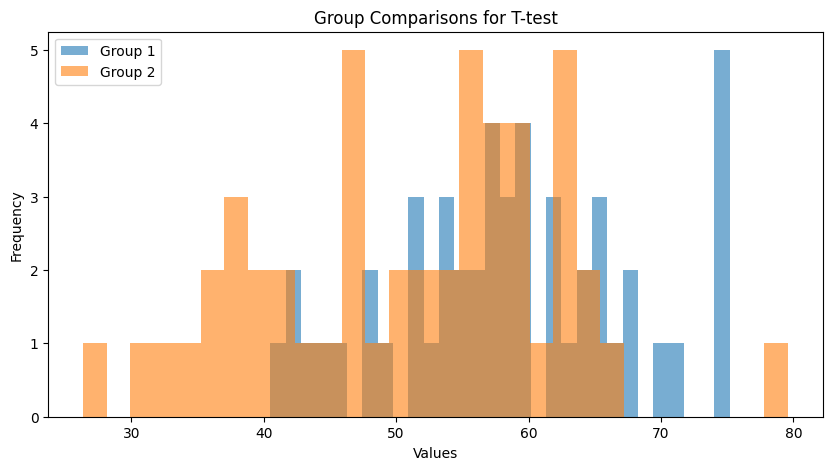

In [6]:
# Generating data for two groups
group1 = np.random.normal(55, 10, 50)
group2 = np.random.normal(50, 10, 50)

# Performing a T-test
t_stat, p_value = stats.ttest_ind(group1, group2)

# Outputting T-test results
print(f"T-Statistic: {t_stat:.2f}, P-value: {p_value:.3f}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.hist(group1, bins=30, alpha=0.6, label='Group 1')
plt.hist(group2, bins=30, alpha=0.6, label='Group 2')
plt.title('Group Comparisons for T-test')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## ANOVA Test Example
ANOVA is used to compare the means of three or more groups to see if at least one group mean is different.

F-Statistic: 10.06, P-value: 0.000


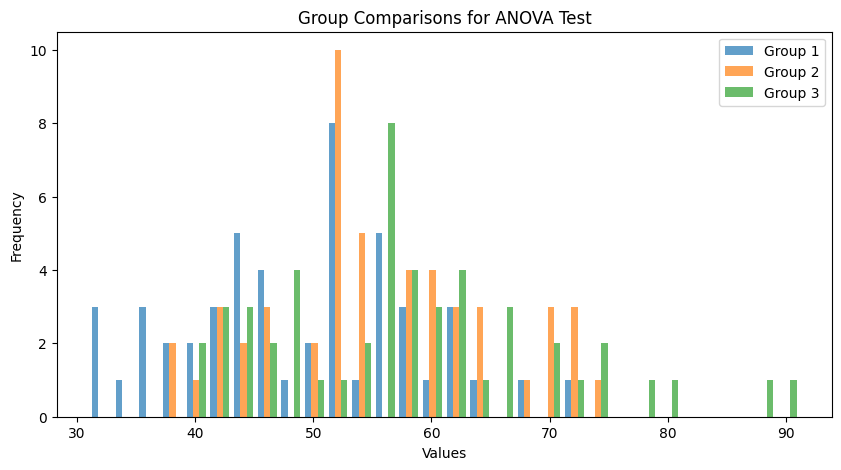

In [7]:
# Generating data for three groups
group1 = np.random.normal(50, 10, 50)
group2 = np.random.normal(55, 10, 50)
group3 = np.random.normal(60, 10, 50)

# Performing ANOVA
f_stat, p_value = stats.f_oneway(group1, group2, group3)

# Outputting ANOVA results
print(f"F-Statistic: {f_stat:.2f}, P-value: {p_value:.3f}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.hist([group1, group2, group3], bins=30, alpha=0.7, label=['Group 1', 'Group 2', 'Group 3'])
plt.title('Group Comparisons for ANOVA Test')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Chi-square Test Example
The Chi-square test is used for categorical data to test the hypothesis about the association between categorical variables.

Chi-square Statistic: 27.86, P-value: 0.000


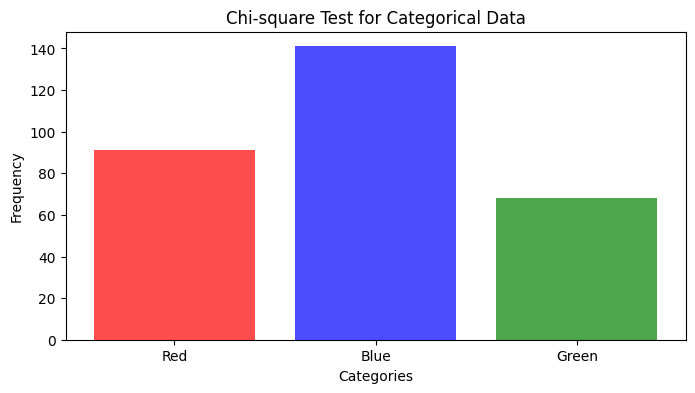

In [8]:
from scipy.stats import chisquare  # Importing the chisquare function

# Generating categorical data
data = np.random.choice(['Red', 'Blue', 'Green'], size=300, p=[0.3, 0.5, 0.2])
observed = [sum(data == 'Red'), sum(data == 'Blue'), sum(data == 'Green')]

# Performing Chi-square test
chi_stat, p_value = chisquare(f_obs=observed)

# Outputting Chi-square test results
print(f"Chi-square Statistic: {chi_stat:.2f}, P-value: {p_value:.3f}")

# Plotting the results
colors = ['Red', 'Blue', 'Green']
plt.figure(figsize=(8, 4))
plt.bar(colors, observed, color=colors, alpha=0.7)
plt.title('Chi-square Test for Categorical Data')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

## Regression Analysis Example
Regression analysis is used to understand the relationship between dependent and independent variables.

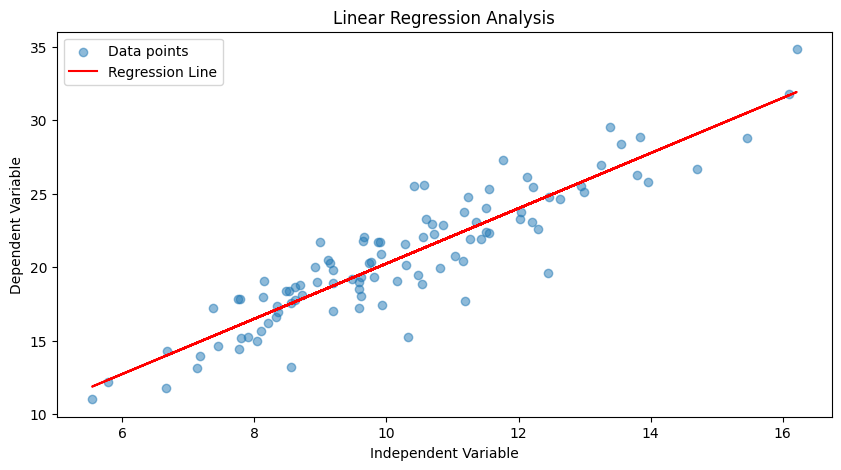

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     463.2
Date:                Fri, 31 May 2024   Prob (F-statistic):           6.45e-39
Time:                        10:13:39   Log-Likelihood:                -203.58
No. Observations:                 100   AIC:                             411.2
Df Residuals:                      98   BIC:                             416.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4710      0.910      1.616      0.1

In [9]:
# Generating some data
x = np.random.normal(10, 2, 100)
y = 2 * x + np.random.normal(0, 2, 100)

# Adding a constant term for the intercept
x = sm.add_constant(x)  # This adds a constant column to input features

# Fit the regression model
model = sm.OLS(y, x).fit()

# Plotting the regression
plt.figure(figsize=(10, 5))
plt.scatter(x[:, 1], y, alpha=0.5, label='Data points')
plt.plot(x[:, 1], model.predict(x), 'r', label='Regression Line')
plt.title('Linear Regression Analysis')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()

# Printing the summary of the regression model
print(model.summary())